.

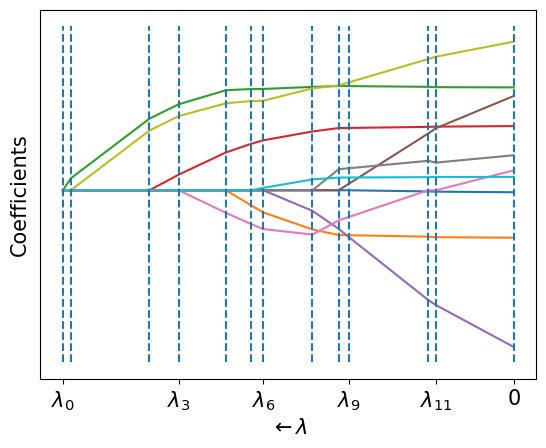

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure()
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel(r'$\leftarrow \lambda$',fontsize=15)
plt.ylabel('Coefficients',fontsize=15)
yticks = [r"$\lambda_0$",r"$\lambda_3$", r"$\lambda_6$", r"$\lambda_9$", r"$\lambda_{11}$", "0"]
plt.xticks([xx[0],xx[3],xx[6],xx[9],xx[11],xx[-1]],yticks,fontsize=15)
plt.yticks([],[])
plt.axis('tight')
plt.savefig('figures/Figure_6_a.png')

Computing regularization path using the LARS ...
.

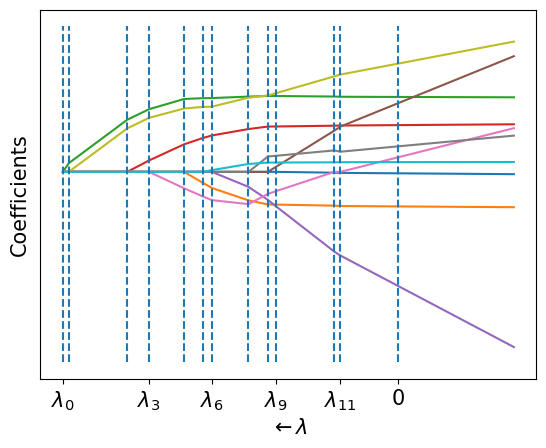

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

diff = (coefs[:,-1] - coefs[:,-2])
new = (2*diff + coefs[:,-1]).reshape(-1,1)
coefs = np.concatenate([coefs, new],axis=1)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure()
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx[:-1], ymin, ymax, linestyle='dashed')
plt.xlabel(r'$\leftarrow \lambda$',fontsize=15)
plt.ylabel('Coefficients',fontsize=15)
yticks = [r"$\lambda_0$",r"$\lambda_3$", r"$\lambda_6$", r"$\lambda_9$", r"$\lambda_{11}$", "0"]
plt.xticks([xx[0],xx[3],xx[6],xx[9],xx[11],xx[12]],yticks,fontsize=15)
plt.yticks([],[])
plt.axis('tight')
plt.savefig('figures/Figure_6_b.png')